# Badminton vs Tennis Classifier

inspierd from [Fast.ai Lesson 1](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb)

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
bs = 16
DATA_PATH = "data/badmintonvstennis/"

In [3]:
!ls {DATA_PATH}

models
train
valid


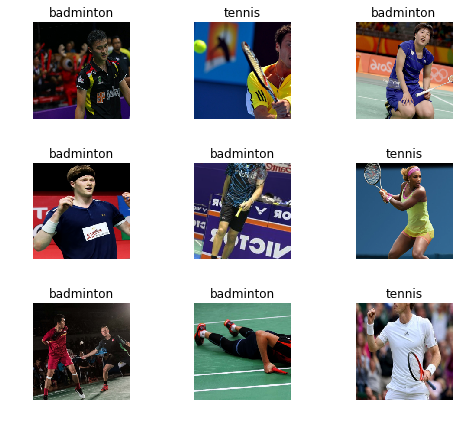

In [4]:
data = ImageDataBunch.from_folder(DATA_PATH, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [6]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.779818,0.480586,0.137500,00:53
1,0.661737,0.465940,0.125000,00:47
2,0.536790,0.438289,0.150000,00:50
3,0.444331,0.399791,0.150000,00:52


In [8]:
learn.save('stage-1')

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

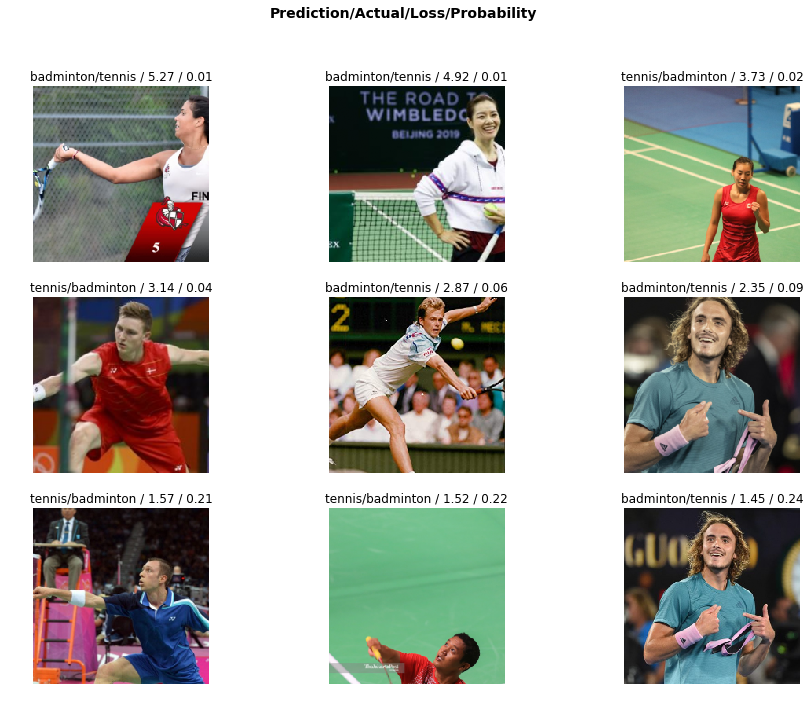

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

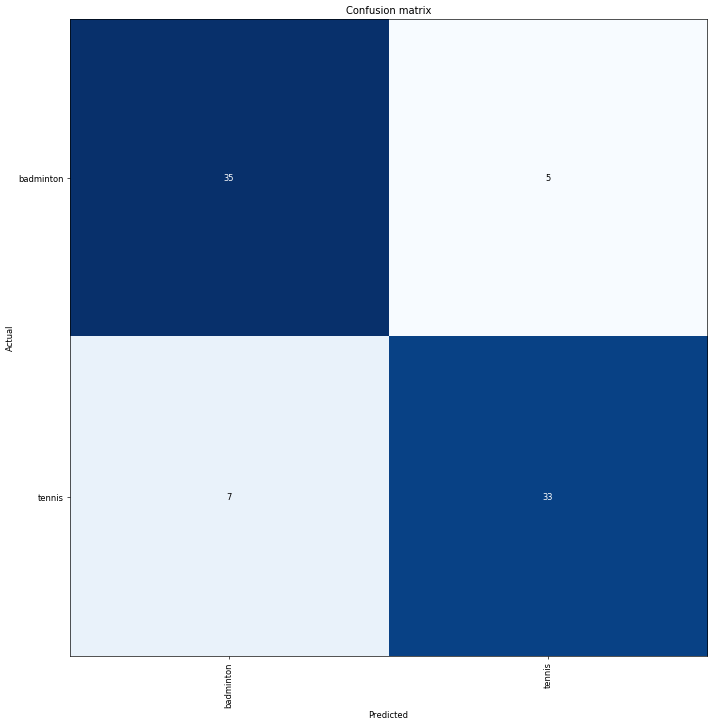

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
interp.most_confused(min_val=2)

[('tennis', 'badminton', 7), ('badminton', 'tennis', 5)]

In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.792593,0.884973,0.237500,00:46


In [15]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (326 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
badminton,badminton,badminton,badminton,badminton
Path: data\badmintonvstennis;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
badminton,badminton,badminton,badminton,badminton
Path: data\badmintonvstennis;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): Bat

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


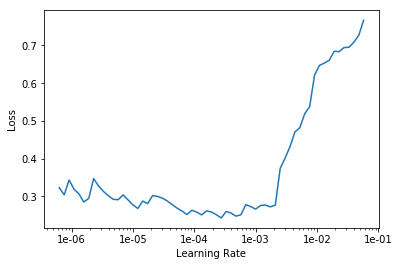

In [17]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(3e-05, 3e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.208795,0.378643,0.112500,00:48
1,0.271373,0.472575,0.125000,00:48
2,0.286855,0.295507,0.112500,00:47
3,0.209310,0.276046,0.087500,00:45


In [20]:
learn.save("stage-2")

In [ ]:
learn.load("stage-2")
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)